In [62]:
import pandas as pd
import numpy as np
import os
import csv
import sys
import swifter

csv.field_size_limit(100000000)

100000000

# Importing Dataset from Kaggle and FakeNewsCorpus 
# With Cleaning

In [63]:
kaggle_csv = pd.read_csv('./work/Datasets/Combined_Dataset/combined_data.csv', usecols=['title', 'label'])
kaggle_csv.head(2)

,title,label
0,Four ways Bob Corker skewered Donald Trump,reliable
1,Linklater's war veteran comedy speaks to moder...,reliable


In [64]:
corpus_csv = pd.read_csv('./work/Datasets/FakeNewsCorpusTrimmed/cleaned_data_titles.csv', usecols=['title', 'type'])
corpus_csv.columns = ['label', 'title']
corpus_csv.head(2)

,label,title
0,fake,Surprise: Socialist Hotbed Of Venezuela Has Lo...
1,fake,Water Cooler 1/25/18 Open Thread; Fake News ? ...


In [65]:
combined_title_df = pd.concat([corpus_csv, kaggle_csv])
combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4469371 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   object
dtypes: object(2)
memory usage: 102.3+ MB


In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re

ps = PorterStemmer()

def clean_content(text):
    text = re.sub(r"http\S+", "", text)

    # Tokenize and Remove non alphanumeric characters
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    allalpha_tokens = [word for word in tokens if word.isalpha()]

    # Porter stemmer back to basic english words
    words = [ps.stem(word) for word in allalpha_tokens if not word in stopwords.words('english')]
    words = ' '.join(words)
    return words 
    

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
combined_title_df = combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)

combined_title_df['title'] = combined_title_df['title'].swifter.apply(lambda x: clean_content(x))

combined_title_df = combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)

combined_title_df

Pandas Apply:   0%|          | 0/4469211 [00:00<?, ?it/s]

<ipython-input-67-28ca03e13631>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_title_df['title'] = combined_title_df['title'].swifter.apply(lambda x: clean_content(x))


,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
4469206,fake,trend watch
4469207,fake,trump jr is soon to give a speech for
4469208,fake,ron paul trump anarch altright
4469209,reliable,china accept oversea trial data bid speed drug...


In [68]:
combined_title_df.to_csv('./work/Datasets/Combined_Dataset/processed_title.csv', mode='a', index=False)

print("Done Saving")

Done Saving


# Modeling

In [69]:
import matplotlib.pyplot as plt
import itertools

# Applying confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
# import re

# def making_string(x):
#     temp = re.sub('[^0-9a-zA-Z]+', ' ', x)
#     return temp.strip()

# combined_title_df['title'] = combined_title_df['title'].swifter.apply(lambda x: making_string(x))

# combined_title_df

Pandas Apply:   0%|          | 0/8938423 [00:00<?, ?it/s]

,Unnamed: 0,label,title
0,0.0,fake,surpris socialist hotb of venezuela ha lost ha...
1,1.0,fake,water cooler open thread fake new cnn still wo...
2,2.0,fake,veteran comment call out grow fox new it so ugli
3,3.0,fake,lost word hidden word otter bank book
4,4.0,fake,red alert bond yield are scream come
...,...,...,...
8938418,4469206.0,fake,trend watch
8938419,4469207.0,fake,trump jr is soon to give a speech for
8938420,4469208.0,fake,ron paul trump anarch altright
8938421,4469209.0,reliable,china accept oversea trial data bid speed drug...


In [39]:
combined_title_df = pd.read_csv('./work/Datasets/Combined_Dataset/processed_title.csv', usecols=['label', 'title'])


combined_title_df

,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
8938418,fake,trend watch
8938419,fake,trump jr is soon to give a speech for
8938420,fake,ron paul trump anarch altright
8938421,reliable,china accept oversea trial data bid speed drug...


In [85]:
combined_title_df.label.unique()

array(['fake', 'reliable', 'political', 'type'], dtype=object)

In [86]:
combined_title_df = combined_title_df[combined_title_df.label != 'type']

label_dict = {
    'political': 'reliable',
    'bias': 'fake',
    'unreliable': 'fake',
    'reliable': 'reliable',
    'fake': 'fake'
}

combined_title_df['label'] = combined_title_df['label'].swifter.apply(lambda x: label_dict[x])

combined_title_df

Pandas Apply:   0%|          | 0/4469041 [00:00<?, ?it/s]

<ipython-input-86-ce89e42e9d66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_title_df['label'] = combined_title_df['label'].swifter.apply(lambda x: label_dict[x])


,label,title
0,fake,surpris socialist hotb of venezuela ha lost ha...
1,fake,water cooler open thread fake new cnn still wo...
2,fake,veteran comment call out grow fox new it so ugli
3,fake,lost word hidden word otter bank book
4,fake,red alert bond yield are scream come
...,...,...
4469206,fake,trend watch
4469207,fake,trump jr is soon to give a speech for
4469208,fake,ron paul trump anarch altright
4469209,reliable,china accept oversea trial data bid speed drug...


In [87]:
combined_title_df.dropna()
combined_title_df.reset_index(drop=True, inplace=True)
combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469041 entries, 0 to 4469040
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   string
dtypes: object(1), string(1)
memory usage: 68.2+ MB


In [88]:
combined_title_df['title'] = combined_title_df['title'].astype('string')
combined_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469041 entries, 0 to 4469040
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   title   string
dtypes: object(1), string(1)
memory usage: 68.2+ MB
<ipython-input-88-7f4159878163>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_title_df['title'] = combined_title_df['title'].astype('string')


In [89]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(combined_title_df, test_size=0.3, random_state=42)

train_df

,label,title
352915,reliable,vulner republican scrambl get trump trainwreck
3590971,reliable,paid notic death buchbind norman
2716844,reliable,vodafon starhub renew strateg partnership agre...
1063664,reliable,bernank name chairman advisori panel bond gian...
1400710,fake,usdchf downward movement extend
...,...,...
1136074,fake,david limbaugh obama power grab refresh video
1570006,reliable,iran new round up
2234489,fake,cair et al react verdict
4304572,reliable,good surviv


In [90]:
X_train = train_df['title'].tolist()
Y_train = train_df['label'].tolist()
X_test = test_df['title'].tolist()
Y_test = test_df['label'].tolist()

## Naive Bayes Classifier with TF-IDF Vectorizer

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

bayes_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('bayes', MultinomialNB())])

In [92]:
bayes_model = bayes_model.fit(X_train, Y_train)

Accuracy:    0.8302097466049781
Confusion matrix, without normalization


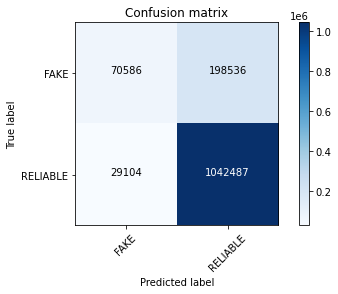

In [93]:
from sklearn import metrics

pred = bayes_model.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy:   ", score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'RELIABLE'])

## Linear SVM using SGDClassifier with TF-IDF Vectorizer

In [94]:
from sklearn.linear_model import SGDClassifier
svm_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('svm', SGDClassifier(loss='hinge', alpha=1e-3, penalty='l2', random_state=42))])
svm_model = svm_model.fit(X_train, Y_train)

Accuracy:  0.8302097466049781
Confusion matrix, without normalization


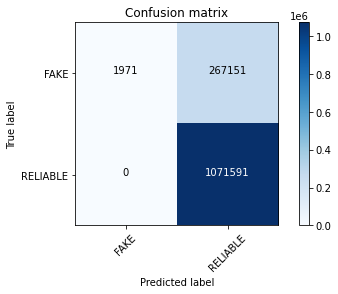

In [95]:
svm_pred = svm_model.predict(X_test)
svm_score = metrics.accuracy_score(Y_test, pred)
print("Accuracy: ", svm_score)
svm_cm = metrics.confusion_matrix(Y_test, svm_pred)
plot_confusion_matrix(svm_cm, classes=['FAKE', 'RELIABLE'])

## SVM with TF-IDF Vectorizer and Passive Aggressive Classifier

In [98]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_model = Pipeline([('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1,3))), ('passive_aggressive', PassiveAggressiveClassifier(n_iter_no_change=50))])


Accuracy:  0.8110236866503122
Confusion matrix, without normalization


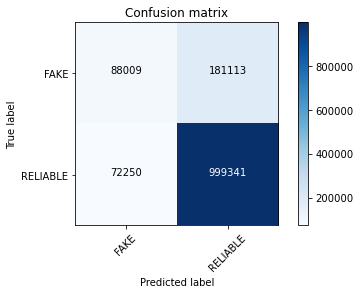

In [99]:
pa_model.fit(X_train, Y_train)
pa_pred = pa_model.predict(X_test)
pa_score = metrics.accuracy_score(Y_test, pa_pred)
print("Accuracy: ", pa_score)
pa_cm = metrics.confusion_matrix(Y_test, pa_pred)
plot_confusion_matrix(pa_cm, classes=['FAKE', 'RELIABLE'])